In [1]:
import pandas as pd

In [2]:
# from FanGraphs, get DWAR usingTY data
def read_errr(year):
    df = pd.read_csv(f'DWAR {year - 1}-{year}.csv', index_col=False).sort_values('Inn', ascending=False).drop_duplicates(subset='playerid', keep='last')
    
    df = df[df['ErrR'].notna()].sort_values("ErrR")
    df['ErrR/Inn'] = df['ErrR'] / df['Inn']
        
    # join with player ids
    player_map = pd.read_csv('../PLAYERIDMAP 2022.csv')[['IDFANGRAPHS', 'PLAYERNAME', 'MLBID']]#.set_index('IDFANGRAPHS')
        
    df['playerid'] = df['playerid'].astype(str)
    
    merge = df[['playerid','ErrR/Inn']].merge(player_map, how='left', left_on='playerid', right_on='IDFANGRAPHS').set_index('MLBID')[['PLAYERNAME', 'ErrR/Inn']]
        
    mean = merge['ErrR/Inn'].mean()
    std = merge['ErrR/Inn'].std()
    
    merge['Z'] = (merge['ErrR/Inn'] - mean) / std
    
    return merge[['PLAYERNAME', 'Z']].reset_index().groupby(['MLBID', 'PLAYERNAME']).max().reset_index().set_index('MLBID')

e_data = read_errr(2022)
e_data.head()

,PLAYERNAME,Z
MLBID,,
405395.0,Albert Pujols,0.495274
429664.0,Robinson Cano,0.463876
444482.0,David Peralta,0.141105
444876.0,Alcides Escobar,-0.257806
446334.0,Evan Longoria,0.163113


1.4619201988335506
-14.025712928495285
2.055409258673774


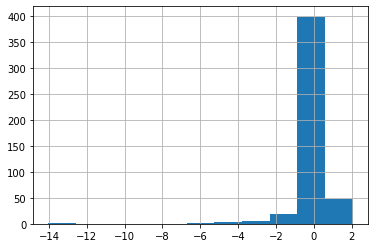

In [3]:
print((e_data['Z'].max() - e_data['Z'].min()) / 11)
print(e_data['Z'].min())
print(e_data['Z'].max())
hist = e_data['Z'].hist(bins=11)

In [4]:
# floor and increment based on players with min. 150 innings
def get_error(e):
    i = 0
    while i < 10:
        floor = -4.87 + (i * 0.686)
        if e > floor:
            i += 1
        else:
            break
    return 4 + i

In [8]:
def assign_er(year):
    er_data = read_errr(2022)
    er_data['Error Resistance'] = er_data.apply(lambda x: get_error(x['Z']), axis=1)
    return er_data[['PLAYERNAME', 'Error Resistance']].dropna()

er_df = assign_er(2022)
er_df.head()

,PLAYERNAME,Error Resistance
MLBID,,
405395.0,Albert Pujols,12
429664.0,Robinson Cano,12
444482.0,David Peralta,12
444876.0,Alcides Escobar,11
446334.0,Evan Longoria,12


In [48]:
er_df.to_csv('2022_ER.csv')

In [9]:
er_df[er_df['PLAYERNAME'] == 'Mike Zunino']

,PLAYERNAME,Error Resistance
MLBID,,


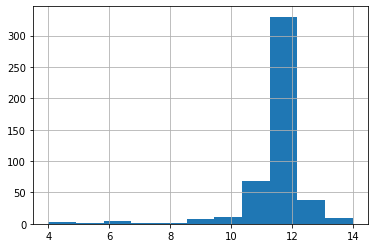

In [6]:
er_df = er_df['Error Resistance'].hist(bins=11)